# Machine Learning and Statistics **PROJECT**
by Andreia Santos

DATE:  10th December 2023
***

### **Reset workspace and libraries upload**
Attention!! This command requires caution as it permanently erases all objects and imported modules, offering no recovery option. This command is commonly employed to initiate a clean workspace, minimizing conflicts or unexpected errors resulting from prior definitions.

In [168]:
%reset -f

In [169]:
# python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from collections import Counter
from itertools import combinations
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


***


## **Part 1 - Machine learning**

#### _Supervised vs unsupervised learning_

Machine learning is just one piece of solving problems. Though there are a lot of technical things it is important to remember the main goals and have present the big picture. 


Machine learning algorithms are segmented in two distinct categories:  supervised and unsupervised learning.  
In supervised learning, the algorithm receives pairs of things (ex : features)   and their correct answers (ex: class) . The scope of this algorithm is to be able to predict answers for new things that it has not seen before. The reason why is categorized as supervised algorithms is because this algorithm learns with the help of a "teacher" who provides correct answers. This “teaching” mode is known as the training process. Specifically, the algorithm creates a model with its internal parameters which intention is to minimize the difference between the predicted output and the actual corrected answers (1). 

Oppositely, the unsupervised learning the algorithm, only knows about the input data and no output information is given. Typically, this are more challenging algorithms to understand and assess compared to supervised methods (1). 

#### _Classification and Regression_

Supervised machine learning has two main types: classification and regression.
In classification, the goal is to sort things into different groups. There are two types of classification: one is to separate things into two groups - binary classification. The other type involves sorting things into more than two groups - multiclass classification (1).

In regression, the aim to predict a continuous number, such as estimating people’s income from factors like education and age. It deals with a range of possible values, where small differences between predicted and actual numbers matter. This contrasts with the classification algorithm once there will be intermediate values for example in predicting income through regression, the result can be any amount, while in classification, things are sorted into clear categories without any in-between stages(1).



One piece of toolkit that is used on Python machine learning is the “scikit-learn”. This library includes submodules that are useful for:
1.	Classification - sorting things into groups. It can use things like SVM, nearest neighbors, random forest, and logistic regression.
2.	Regression - Predicting numbers: It can used to predict numbers using methods like Lasso and ridge regression.
3.	Clustering - Grouping similar things together using k-means and spectral clustering,
4.	  Dimensionality reduction – simplify the data by making simpler big sets of data using PCA, feature selection, and matrix factorization.
5.	Model selection – select the best model to data using grid search and cross-validation for example.
6.	Preprocessing - prepare data so it gets ready for the machine learning by applying algorithm as feature extraction and normalization (2).


(1)	Mueller, A., & Guido, S. (2016). Introduction to Machine Learning with Python (1st edition) . O'Reilly Media

(2)	McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O'Reilly Media.




#### _Brief dataset description_

The iris dataset includes information about 150 flowers across different iris species: Setosa, Versicolor, and Virginica. Each class is equally represented, reaching a total of 50 flowers on each of the three classes. 

Despite the classification of each individual flower and additional four  numerical descriptores are described , namely: 
        <li>  sepal length (ranging from 4.3 to 7.9 mm)</li> 
        <li> sepal width (ranging from 2.0 to 4.4 mm)</li>
        <li> petal length (ranging from 1.0 to 6.9 mm)</li> 
        <li> petal width (ranging from 0.1 to 2.5 mm)</li> 
 
These four variables correspond to measurements that are continuous and quantitative descriptors that characterize the flower's physical dimensions and are typically used for predicting  the flower class. The last variable  corresponds to a nominal variable that defines the iris specie which  belongs the flower, namely: Setosa, Versicolor, and Virginica. Important to note that this categorical variable does not have a relevance as a numerical representation opposite to the flower’s descriptive  features.

All the dataset info can be found on the original file as is shown on the blocks below through the details constined on the iris object. 



In [170]:
# Upload the dataset  
iris = datasets.load_iris()


In [171]:
# Access the info included on the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

***


## **Part 2 - Classification algorithm**


The chosen classification algorithm is the k-NN. This is  one of the simplest supervised classification algorithms. 

The created model relies exclusively on saving the training dataset. When it needs to predict a new piece of data, it looks for the closest similar data points on the previous saved training dataset which are its nearest neighbors. 


In its basic form, the k-NN algorithm looks at just one nearest neighbor (k=1), the closest point in the training data to the point its being predicted. The predicted output will be the known output of this closest training point. 


The K-Nearest Neighbors (KNN) algorithm typically employs the _Euclidean_ distance method to find the closest points, although alternatives like _Manhattan_ and _Cosine_ distances are available. The euclidean_distance function computes the Euclidean distance between two points in the feature space. It determines the spatial separation between each pair of data points using the following formula:




$ {Euclidean Distance} = \sqrt{\sum_{i=1}^{n}(x_{1i} - x_{2i})^2} $



The  $x_{1i}$ and $x_{2i}$ represent the $i$ th feature of two data points $x_{1}$ and $x_{2}$ and $n$  denotes the number of features in the dataset


#### __Splitting the dataset: train and test__
##### Method 1 - basic approach


Splitting the data into parts helps prevent the algorithm from learning too much from just one set of examples, which can lead to overfitting. Overfitting occurs when the algorithm becomes too focused on specific details and does not perform well with new data.
 
Usually, the dataset is divided into two groups: the training set and the test set. 
The test set contains data that the model has not learned from, and it is used to see how well the classification model works. 
This separation helps ensure the model is not just memorizing, but actually understanding and working effectively with new information. 

The split percentage between training and test sets can vary depending on the size of the dataset.There is no optimal split percentage. The choice of splitage should align with your project's goals, considering factors such as the computational resources required for training and evaluating the model, as well as how well the training and test sets represent the entire dataset and real-world scenarios.

However the common split ratios are (3):
- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50% 

(3)	https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

For this dataset a split of 80 % train and 20 % test was selected, meaning that 30 flowers were considering for evaluating the classifier model and the remain 120 flowers were consider for the training of the algorithm.


#####  _Upload the dataset and preliminary vizualization_

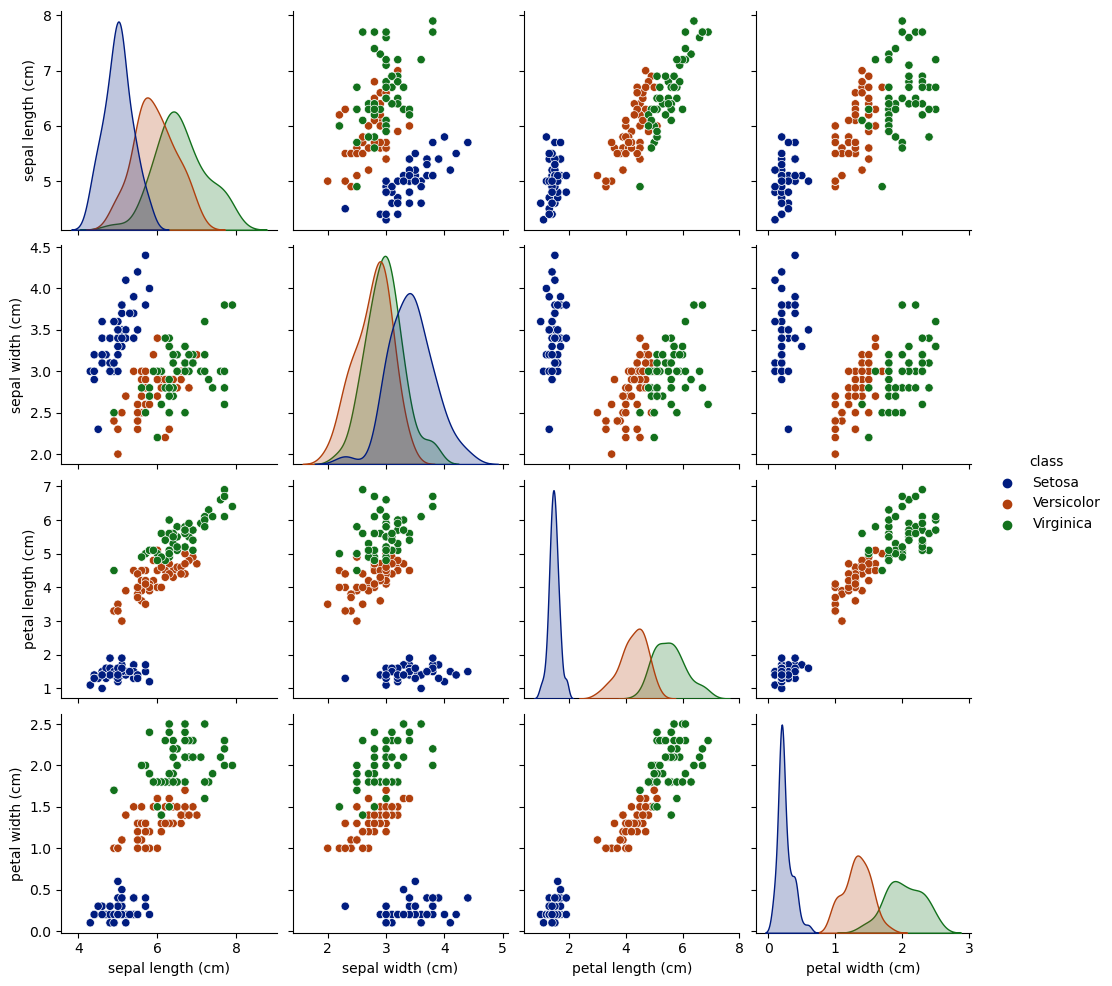

In [172]:
# Creating a DataFrame using the original dataset information
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding a 'class' column based on the target variable
iris_df['class'] = iris.target

# Mapping numeric class labels to class names
class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris_df['class'] = iris_df['class'].map(class_names)

# Visualizing relationships using seaborn's pairplot with updated class names in the legend
sns.pairplot(iris_df, hue='class', palette='dark', hue_order=['Setosa', 'Versicolor', 'Virginica'])



plt.savefig('images/output_raw-pairplot.png')
plt.show()



#####  _Data set preparation - cleaning empty lines_

Verifying and handling empty cells or missing values, known as data cleaning, is essential to maintain data integrity and quality. This process ensures that analyses and machine learning models are based on complete, reliable data, leading to accurate and trustworthy results.

In [173]:
# Count the number of rows before dropping missing values
rows_before = len(iris_df)

# Drop rows with any empty cells (NaN values)
iris_df.dropna(inplace=True)

# Count the number of rows after dropping missing values
rows_after = len(iris_df)

# Check if any rows were dropped due to missing values
if rows_before != rows_after:
    print(f"Empty values were found and {rows_before - rows_after} rows were dropped.")
else:
    print("No empty values were found.")

    
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['class']


No empty values were found.


#####  _Data set preparation - data normalization_

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: class, Length: 150, dtype: object

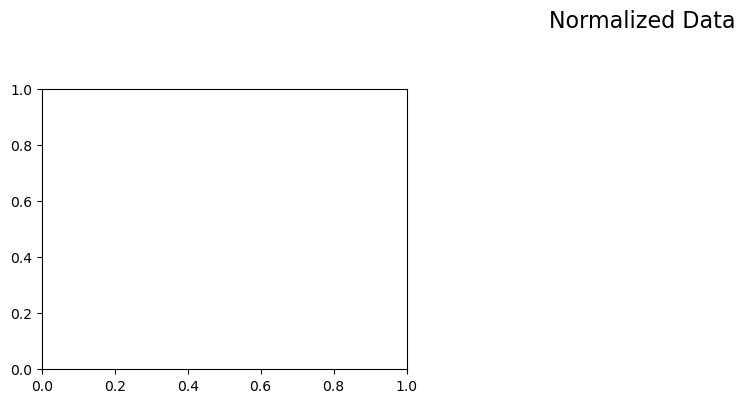

In [174]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the entire dataset
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=iris.feature_names)

# Get feature names
feature_names = list(X_normalized.columns)

# Get all combinations of the features for plotting
feature_combinations = list(combinations(range(len(feature_names)), 2))

# Plotting
plt.figure(figsize=(16, 8))
plt.suptitle("Normalized Data", fontsize=16)  # Add main title

# Loop through each feature combination and create subplots
for i, (feature1, feature2) in enumerate(feature_combinations, start=1):
    plt.subplot(2, 3, i)
    scatter = plt.scatter(X_normalized.iloc[:, feature1], X_normalized.iloc[:, feature2], c=y, cmap='viridis', edgecolor='k')
    plt.xlabel(f'{feature_names[feature1]}')
    plt.ylabel(f'{feature_names[feature2]}')
    plt.title(f'{feature_names[feature1]} vs {feature_names[feature2]}')

# Add a legend based on the target classes
handles, labels = scatter.legend_elements()
plt.legend(handles, iris.target_names, loc='center left', bbox_to_anchor=(1, 0.5), title='Species')

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])  # Adjust the rect parameter for additional space


plt.savefig('images/output_normalized-dataset.png')
plt.show()




#####  _Splitting the data: train and test subset_

In [178]:
# Splitting data between train and test dataset (80% train, 20% test).
# In order to keep the splitting consistent ensuring reproducible outcomes everytime the code is run the "train_test_split" function is set with a fixed seed of 30 


X_normalized_array = X_normalized.values

X_train, X_test, y_train, y_test = train_test_split(X_normalized_array, y, test_size=0.2 , random_state=30)


##### _Mathematical notation - KNN algorithm deconstructed_ 

In [179]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Define the kNN classifier function
def kNN(train_data, train_labels, test_data, test_labels, k=3):
    predictions = []

    for test_point in test_data:
        distances = []

        # Calculate distances between the test point and all training points
        for train_point in train_data:
            # Euclidean distance calculation
            distance = np.sqrt(np.sum((test_point - train_point) ** 2))
            distances.append(distance)

        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # Get labels of k nearest neighbors
        k_labels = [train_labels[i] for i in k_indices]

        # Perform majority voting to determine the predicted class
        most_common = Counter(k_labels).most_common(1)
        predicted_label = most_common[0][0]
        predictions.append(predicted_label)

    # Calculate accuracy
    correct = np.sum(predictions == test_labels)
    total = len(test_labels)
    accuracy = correct / total

    return accuracy

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into training and testing sets - use the raw dataset and not the normalized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Using the kNN classifier function
k = 3  # Number of neighbors
accuracy = kNN(X_train, y_train, X_test, y_test, k)

# Display accuracy
print(f"Accuracy of kNN classifier on Iris dataset: {accuracy:.2f}")

Accuracy of kNN classifier on Iris dataset: 0.93


In other hand the the scikit-learn library provides a convenient implementation of the  k-NN classifier algorithm, simplifying its usage. 

Moreover, in order to investigate how the k-NN classifier responds to different numbers of neighbors, a loop was employed to evaluate the classifier's accuracy. The loop considered a range of neighbors from 1 to 31, allowing an assessment of the algorithm's performance. A 2D plot was then generated to visually illustrate the impact of varying neighbors on the model's accuracy.

The decision to employ accuracy as the primary evaluation metric was motivated by its capability to gauge correct predictions across all classes. This choice was influenced by the characteristics of the Iris dataset, which comprises equally important classes without significant imbalances. Consequently, accuracy emerged as a suitable metric for assessing the classifier's performance.


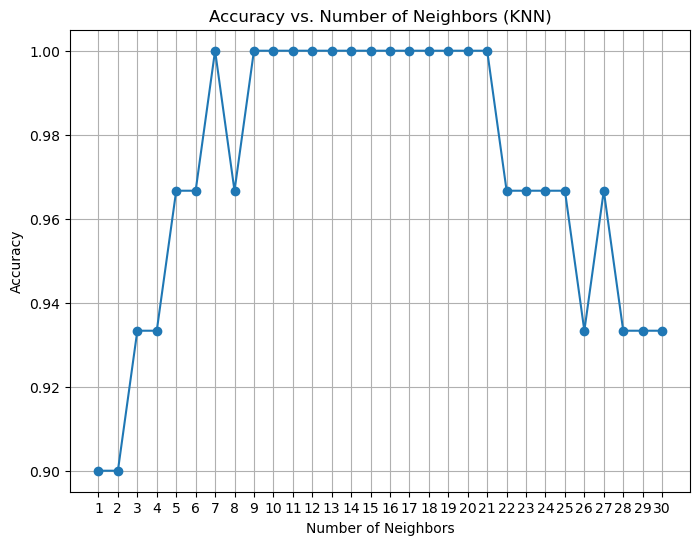

The maximum accuracy of 1.00 occurs with 7 neighbors.


In [180]:
# Split the data into training and testing sets - use normalized dataset
#X_train, X_test, y_train, y_test = train_test_split(X_normalized_array, y, test_size=0.2, random_state=42)



# Creating lists to store values for plotting
neighbors_list = list(range(1, 31))  # Range of n_neighbors values (1 to 31)
accuracy_values = []
max_accuracy = 0
optimal_neighbors = 0

# Loop through different values of n_neighbors
for n in neighbors_list:
    # Create a KNN classifier with a specific number of neighbors
    clf = KNeighborsClassifier(n_neighbors=n)
    
    # Fit the model to the train subset
    clf.fit(X_train, y_train)
    
    # Use the trained model to predict on the test subset
    y_pred = clf.predict(X_test)
    
    # Calculate and store accuracy for each n_neighbors
    accuracy = clf.score(X_test, y_test)
    accuracy_values.append(accuracy)

    # Find and store the maximum accuracy and its corresponding number of neighbors
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimal_neighbors = n

# Plotting the graph for n_neighbors vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(neighbors_list, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (KNN)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 31, step=1))  # Set x-axis ticks from 1 to 31
plt.grid(True)

plt.savefig('images/Accuracy vs. Number of Neighbors (KNN).png')
plt.show()

print(f"The maximum accuracy of {max_accuracy:.2f} occurs with {optimal_neighbors} neighbors.")



The plotted data demonstrates a trend where accuracy generally decreases as the number of neighbors increases. Interestingly, the minimal optimal selection for the  k-nearest neighbors (KNN) algorithm seems to be 7, attaining a noteworthy accuracy of 1. From 1 neighbor exclusively, the accuracy value consistently climbs up to 9 neighbors, achieving a maximum accuracy value of 0.9.

##### Method 2 - alternative method for splitting the data (Cross- validation)

Other alternative method for splitting the data between test and training groups is the Cross- validation. This method presents an advantageous alternative approach for dividing data, improving model assessment, and resolving potential concerns linked to dataset division. In contrast to a solitary train-test separation, cross-validation entails segmenting the dataset into numerous subsets. This enables the model to undergo training and testing multiple times across distinct data portions. Through systematic rotation among these subsets, cross-validation furnishes a sturdier evaluation of the model's performance, lessening the impact of fluctuations within a sole split. This technique assists in attaining a more dependable assessment of the model's capacity to generalize to new data, rendering it a valuable method in machine learning to ensure model dependability and alleviate potential biases stemming from a singular division.

Considering the previously determined optimal kNN value as 9, the following code aims to identify the best number of cross-validation subsets. The code explores a range from 2 to 10 different subsets to evaluate model performance.

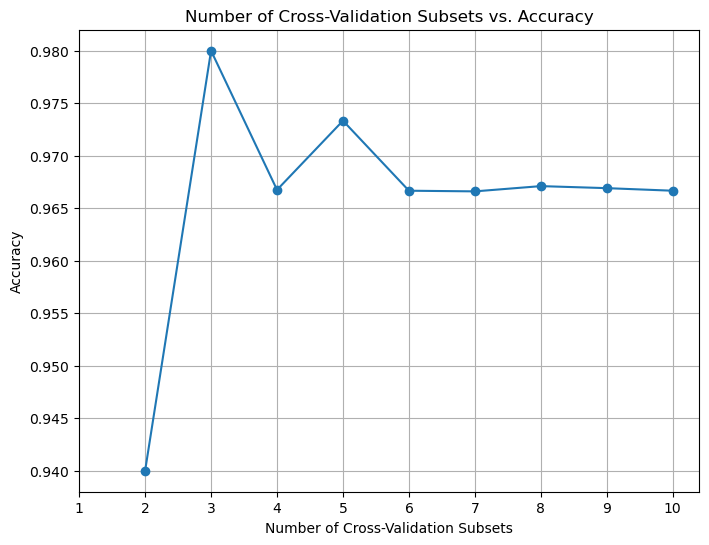

In [181]:

# Create lists to store accuracy scores and number of folds
accuracy_scores = []
num_folds = list(range(2, 11))  # Range of cross-validation numbers from 1 to 10

# Create a KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)

# Loop through cross-validation numbers from 1 to 10
for k in num_folds:
    # Perform k-fold cross-validation
    scores = cross_val_score(clf, X, y, cv=k, scoring='accuracy')
    
    # Compute the mean accuracy and append to the accuracy scores list
    accuracy_scores.append(scores.mean())

# Plotting the graph: Number of cross-validation subsets vs. Accuracy
plt.figure(figsize=(8, 6))
plt.plot(num_folds, accuracy_scores, marker='o', linestyle='-')
plt.title('Number of Cross-Validation Subsets vs. Accuracy')
plt.xlabel('Number of Cross-Validation Subsets')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 11, step=1))  # Set x-axis ticks from 1 to 10
plt.grid(True)

plt.savefig('images/Number of Cross-Validation Subsets vs. Accuracy.png')
plt.show()



Using the same procedure, the accuracy was evaluated for the maximum CV= 3 which corresponds to the maxiumum of accucary

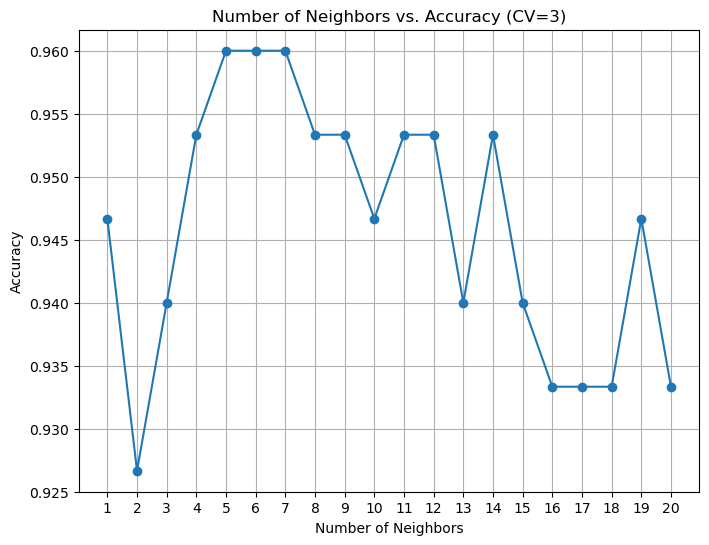

In [182]:

# Fixed number of cross-validation subsets
cv = 3

# Create lists to store accuracy scores and number of neighbors
accuracy_scores = []
num_neighbors = list(range(1, 21))  # Range of neighbor values from 1 to 20

# Loop through different numbers of neighbors (1 to 20)
for k in num_neighbors:
    # Create a KNN classifier with varying number of neighbors
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Perform k-fold cross-validation (fixed at CV=3)
    scores = cross_val_score(clf, X_normalized_array, y, cv=cv, scoring='accuracy')
    
    # Compute the mean accuracy and append to the accuracy scores list
    accuracy_scores.append(scores.mean())

# Plotting the graph: Number of neighbors vs. Accuracy
plt.figure(figsize=(8, 6))
plt.plot(num_neighbors, accuracy_scores, marker='o', linestyle='-')
plt.title('Number of Neighbors vs. Accuracy (CV=3)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, step=1))  # Set x-axis ticks from 1 to 20
plt.grid(True)
plt.savefig('images/Number of Neighbors vs. Accuracy (CV=3).png')

plt.show()


In this dataset, employing cross-validation did not yield an enhancement in accuracy. This method is more suitable for smaller datasets or situations where classes might be inadequately represented. In this context, there appears to be no benefit from using cross-validation, and we favor the Method 1, the basic splitting approach, as the preferred method for this dataset.

#### __Plotting__
#### _Decision Boundaries Maping_ ####

A visual plot between two differerent features helps interpreting how the classifier knn separates between different classes. On the piece of code below is possible to interpret where the  decision boundaries are placed using a filled contour plot (plt.contourf) to represent the classifier's regions for different classes. The represented features are 'sepal length (cm)'and 'sepal width (cm)'. 

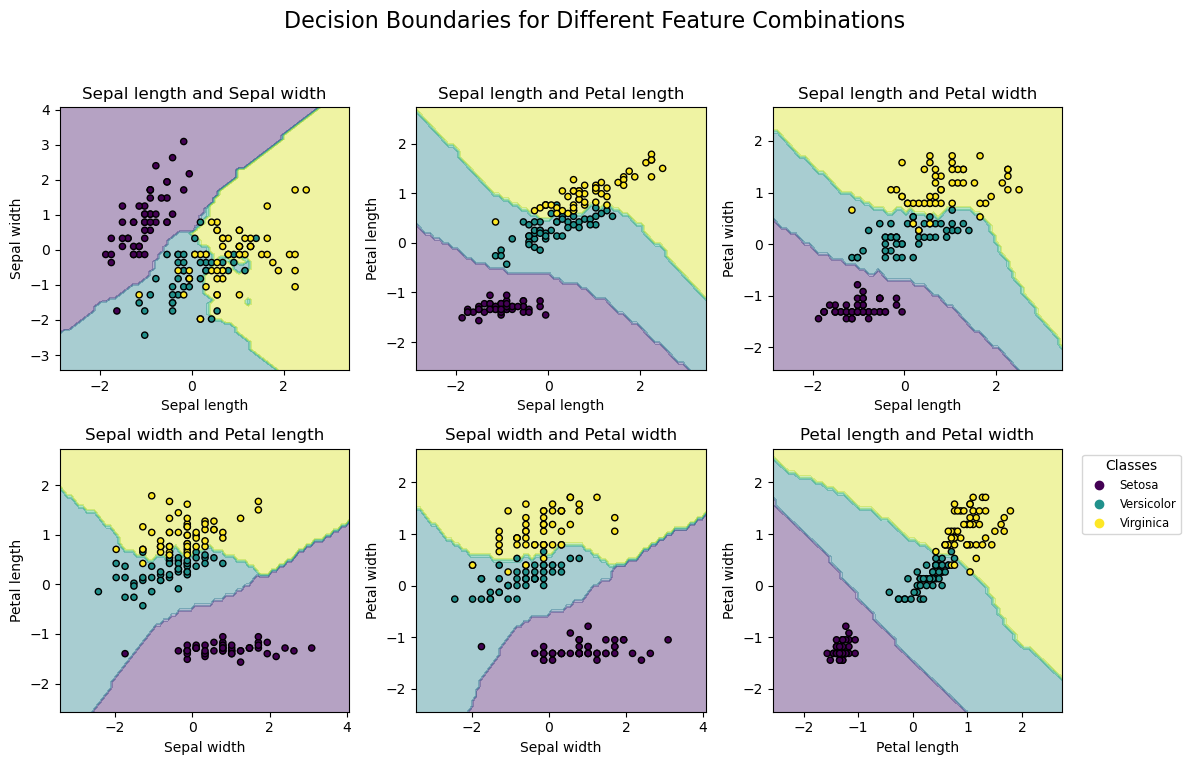

In [183]:
# Define feature names
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

# Get all combinations of the first two features among the four descriptors
feature_combinations = list(combinations(range(4), 2))

# Plot decision boundaries for each combination of features
plt.figure(figsize=(12, 8))  # Set the figure size to avoid overlapping titles
plt.suptitle("Decision Boundaries for Different Feature Combinations", fontsize=16)  # Add main title

for i, features in enumerate(feature_combinations, start=1):
    X_visualize = X_normalized_array[:, features]  # Select features for visualization

    
    clf_visualize = KNeighborsClassifier(n_neighbors=9)  # Set kNN classifier to 9 neighbors
    clf_visualize.fit(X_visualize, iris.target)
    
    # Determine the boundaries for the plot based on feature ranges
    x_min, x_max = X_visualize[:, 0].min() - 1, X_visualize[:, 0].max() + 1  # Determine x-axis limits
    y_min, y_max = X_visualize[:, 1].min() - 1, X_visualize[:, 1].max() + 1  # Determine y-axis limits

    # Create a meshgrid to generate points across the feature space
    # Meshgrid helps create a grid of coordinates using ranges determined above
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))  # Create meshgrid

    # Predict the class labels for each point in the meshgrid using the classifier
    Z = clf_visualize.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict using all the points in the grid
    Z = Z.reshape(xx.shape)  # Reshape prediction values to match the meshgrid shape for plotting


    # Plot decision boundaries
    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X_visualize[:, 0], X_visualize[:, 1], c=iris.target, s=20, edgecolor='k')
    plt.xlabel(feature_names[features[0]])  # Replace feature index with feature name
    plt.ylabel(feature_names[features[1]])  # Replace feature index with feature name
    plt.title(f'{feature_names[features[0]]} and {feature_names[features[1]]}')

# Create a legend based on the target classes
plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor', 'Virginica'], title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space for the main title
plt.savefig('images/Decision Boundaries.png')
plt.show()


The marked regions represent the boundaries where the KNN classifier estimates each class. Flowers within these boundaries are categorized into their respective classes.

Setting 9 neighbors in the classifier underscores the challenges in distinguishing Versicolor from Virginica, while clearly outlining Setosa's distinct separation from the other classes.~


#### _Classifier scoring metrics_ ####

Evaluation metrics such as Accuracy, Precision, Recall, and F1-score serve as essential benchmarks for assessing the effectiveness of machine learning classifiers like the K-Nearest Neighbors (KNN) algorithm. Each metric offers distinct insights into the classifier's performance:

**Accuracy:**

Accuracy assesses how many flowers were correctly identified by the classifier.
It's the number of flowers the model got right divided by all the flowers it looked at.
If accuracy is high, it means the classifier is good at telling apart the different types of iris flowers accurately.

**Precision:**

Precision helps to know how accurate the classifier is when it guesses a specific flower type.
If precision is high for 'setosa', it means most of the flowers predicted as 'setosa' by the model really are 'setosa'.
This shows how well the model avoids wrongly labeling other types as 'setosa'.


**Recall/Sensitivity:**

Recall tells how many flowers of a specific type the model managed to find correctly. If recall is high for 'virginica', it means the model found most of the 'virginica' flowers without missing many.
This indicates that the model is good at recognizing 'virginica' flowers without making too many mistakes by missing them.


**F1-score** 

The F1-score combines precision and recall into one number. It gives a balanced view of how well the classifier is doing. If there is a big difference in the number of flowers of each type, the F1-score helps us see how good the model is at finding all types of flowers without getting too many wrong.


These numbers help to see how good the model is at telling the different kinds of iris flowers apart. If the numbers are high, it means the model is doing a good job at knowing and separating the different types of flowers.


[0.9333333333333333, 0.9435897435897436, 0.9333333333333333, 0.9327777777777778]


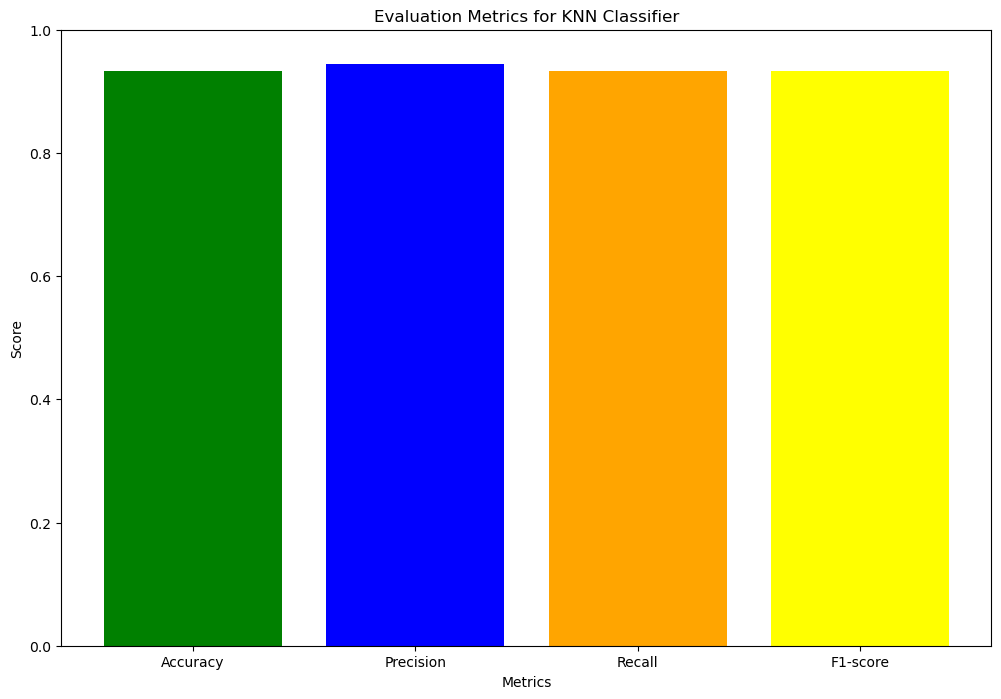

In [186]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plotting the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
print (values)
plt.figure(figsize=(12, 8))
plt.bar(metrics, values, color=['green', 'blue', 'orange', 'yellow'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics for KNN Classifier')
plt.ylim(0, 1)  # Setting y-axis limit to better visualize the scores

plt.savefig('images/Evaluation Metrics for KNN Classifier.png')
plt.show()

When all the evaluation metrics—accuracy, precision, recall, and F1-score—are at the maximum value of 1.0, it suggests that the classifier performed exceptionally well on the Iris dataset. These high scores indicate that the model made no mistakes in predicting any of the classes (Setosa, Versicolor, and Virginica) when using the optimized KNN classifier with k=9.

Comparatively, if the KNN classifier used were k=3, the values for these metrics would likely be lower than 1.0. Lower scores for these metrics with k=3 could imply a slightly less accurate performance compared to k=9, indicating that the model might have made some mistakes in classification.



#### _Confusion Matrix Maping_ ####

The confusion matrix shows how well a classification model predicts different classes. Each row and column in the matrix represents a class. The generated confusion matrix, represented visually as a heatmap, displays numerical values where each row corresponds to the true labels, and each column represents the predicted labels for all classes (Setosa, Versicolor, and Virginica) in the Iris dataset.

The numbers on the diagonal (top-left to bottom-right) show the correct predictions. For example, if a row represents the 'setosa' class, the number on the diagonal in that row shows how many 'setosa' flowers were correctly predicted as 'setosa' by the model.

The numbers off the diagonal represent mistakes or misclassifications. For instance, if a row represents the 'versicolor' class, the number in that row but not on the diagonal tells how many 'versicolor' flowers were incorrectly predicted as another class by the model.


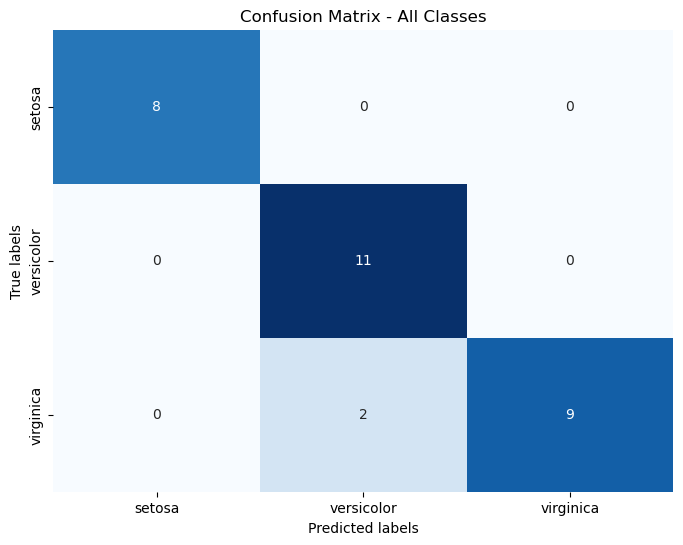

In [187]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - All Classes')

plt.savefig('images/Confusion Matrix - All Classes.png')
plt.show()

The confusion matrix supports the earlier conclusion about the high accuracy score, which was already at the maximum value of 1.0. It further confirms that the classifier performed flawlessly without making any errors when utilizing the optimized KNN (k=9).

As shown in the heatmap:
There are no off-diagonal values, indicating no misclassifications or errors.
Each class (Setosa, Versicolor, and Virginica) aligns perfectly with its true label, with no instances incorrectly labeled as another class.